**Suicide Rates Data Analysis**

This is my first kernel. We will investigate the suicide rates in this data analysis with these parts;

1. Correlation of data
2. Increased population and suicide rates
3. Suicide rate per 100 thousand people
4. Suicide numbers by age groups
5. Comparison of men and women








In [224]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['master.csv']


Lets look first ten data.

In [225]:
data = pd.read_csv("../input/master.csv")
data.head(10)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [21]:
data.describe()


,year,suicides_no,population,suicides/100k_pop,HDIforyear,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


When we look at the correlation of the data, there does not appear to be any data directly related to the number of suicides.

In [5]:
data.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


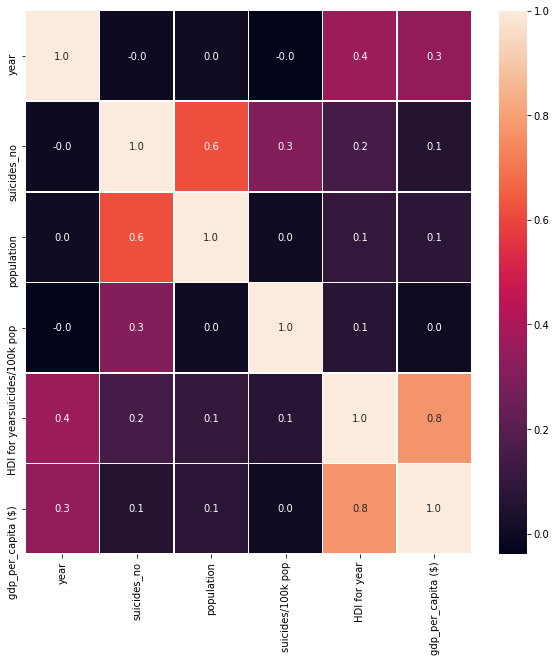

In [6]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [227]:
data.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

Edit data column names.


In [228]:
data.rename(columns={'HDI for year':'HDIforyear'},inplace=True)
data.rename(columns={' gdp_for_year ($) ':'gdp_for_year'},inplace=True)
data.rename(columns={'gdp_per_capita ($)':'gdp_per_capita'},inplace=True)
data.rename(columns={'suicides/100k pop':'suicides/100k_pop'},inplace=True)
data.columns



Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'HDIforyear', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

To examine the number of suicides by years, let's separate the number of years, population and suicide.

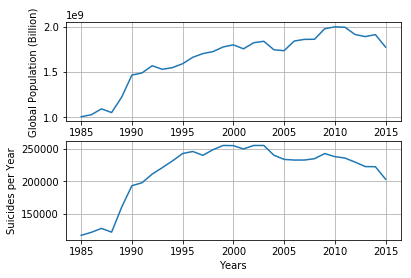

In [109]:
years = sorted(data.year.unique())
population = []
suicides =[]
for year in sorted(years):
    population.append(data[data['year']==year]['population'].sum())
    suicides.append(data[data['year']==year]['suicides_no'].sum())

plt.subplot(2,1,1)
plt.plot(years,population)
plt.xlabel("Years")
plt.ylabel("Global Population (Billion)")
plt.grid()
plt.subplot(2,1,2)
plt.plot(years,suicides)
plt.xlabel("Years")
plt.ylabel("Suicides per Year")
plt.grid()




Increase in the number of suicides due to population growth.Now let's examine the suicide rates per 100 thousand people.

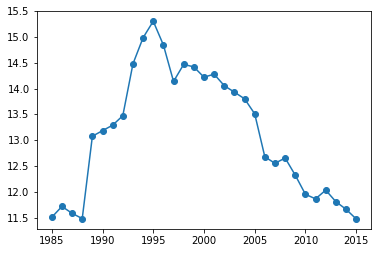

In [110]:
plt.plot(years,np.array(suicides)/np.array(population)*100000,'-o')

Suicide rates of generations are as follows;

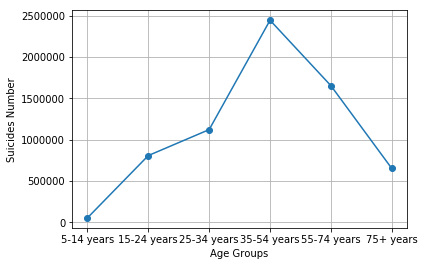

In [126]:
age_groups = data['age'].unique()
age_groups = sorted(age_groups,key=lambda x: float(x[0:1]))
age_groups.insert(0, age_groups.pop(4))
suicides_age_groups = [[data[data['age']==age]['suicides_no'].sum()] for age in age_groups]
plt.plot(age_groups,suicides_age_groups,"-o")
plt.xlabel("Age Groups")
plt.ylabel("Suicides Number")
plt.grid()



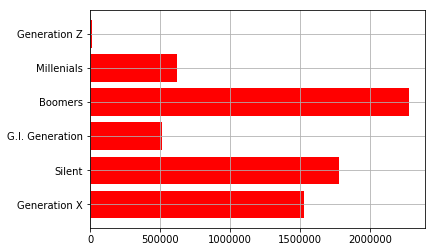

In [159]:
generations = pd.unique(data['generation']) # take all the ex
y_pos = np.arange(len(generations))
gen_suic = [data[data['generation']== gen]['suicides_no'].sum() for gen in generations] # sum over the generations
plt.barh(y_pos,gen_suic, align='center',color="r")
plt.yticks(y_pos,generations)
plt.grid()

Let's examine the rates of female and male population and suicide rates.

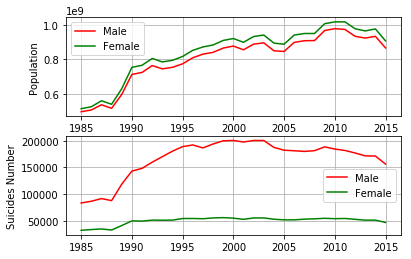

In [223]:
male=data[(data['sex']=="male")]
female=data[(data['sex']=="female")]
m_suic=[]
m_pop=[]
fm_suic=[]
fm_pop=[]
for year in years:
    m_suic.append(male[male['year']==year]['suicides_no'].sum())
    fm_suic.append(female[female['year']==year]['suicides_no'].sum())
    m_pop.append(male[male['year']==year]['population'].sum())
    fm_pop.append(female[female['year']==year]['population'].sum())
plt.subplot(2,1,1)
plt.plot(years,m_pop,color="r",label="Male")
plt.plot(years,fm_pop,color="g",label="Female")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(years,m_suic,color="r",label="Male")
plt.plot(years,fm_suic,color="g",label="Female")
plt.ylabel("Suicides Number")
plt.legend()
plt.grid()

Although male population is less than female, suicide rates are higher in males.

Thanks to my precious teacher [Kaan Can](https://www.kaggle.com/kanncaa1), who has made a great contribution to my introduction to data science.

References:

1. [Data Visualization of Suicide Rates](https://www.kaggle.com/kralmachine/data-visualization-of-suicide-rates)
2. [Suicides with plotly](https://www.kaggle.com/slimco/suicides-with-plotly)

